## Install all the nesessary libraries

In [1]:
%pip -q install numpy pandas matplotlib scikit-learn 


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Import All the Required Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

## Calculate prediction errors using Root Mean Squared Error

In [3]:
def rmse(y_true, y_pred):
    error = (y_true - y_pred) ** 2
    return np.sqrt(np.mean(error))

## Read the dataset

In [26]:
# Path of the file to read
csv_file_path = 'xy_dataset.csv'

# Read the file into a DataFrame
student_data = pd.read_csv(csv_file_path)

# Print summary statistics of the dataset
print(student_data.describe())

# Extract academic performance (feature) and time to first job (target)
academic_performance = student_data['x'].values.reshape((-1, 1))  # e.g., GPA or exam score
months_to_first_job = student_data['y'].values  # months to first job after graduation

               x          y
count  15.000000  15.000000
mean    4.166667   8.266667
std     0.585133   6.029294
min     3.200000   1.000000
25%     3.750000   3.500000
50%     4.200000   6.000000
75%     4.650000  12.500000
max     5.000000  20.000000


## Train the model using Linear Regression

The coefficient of determination shows how close the model values ​​are to the actual values. A higher coefficient value indicates a better fit, i.e. the model can better explain the variation in output given different inputs.

A coefficient value of 1 is a perfect fit, since the predicted and actual output values ​​exactly match.

In [27]:
# Fit linear regression model
model = LinearRegression().fit(academic_performance, months_to_first_job)
coefficient_of_determination = model.score(academic_performance, months_to_first_job)
print('coefficient of determination:', coefficient_of_determination)
print('intercept:', model.intercept_)
print('slope:', model.coef_)

# Predict the response
predicted_months = model.predict(academic_performance)
print('predicted response:', predicted_months, sep='\n')

coefficient of determination: 0.035964299235212716
intercept: 16.408762169680102
slope: [-1.95410292]
predicted response:
[ 6.63824757  6.83365786  8.98317107  8.2015299   7.02906815  9.17858136
  7.41988873  8.00611961  8.78776078  8.39694019  7.22447844 10.15563282
  9.56940195  9.96022253  7.61529903]


## Show the representation of the trained model line

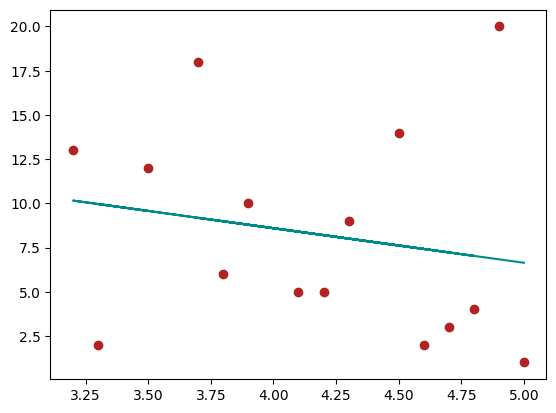

In [28]:
# Create a plot
fig, ax = plt.subplots()

# Plot the regression line and dataset points
ax.scatter(academic_performance, months_to_first_job, color='firebrick', label='Student Data')
ax.plot(academic_performance, predicted_months, color='darkcyan')

plt.show()


## Retrain the model
Let's calculate the determination coefficient for the obtained model. It is critically close to 0, therefore the training was of poor quality and the forecasts obtained from such an algorithm are incorrect. Let's remove several elements from the sample. Let's assume that a good program has a determination coefficient greater than 0.5. Then the cycle will filter the values ​​in the sample. The error is estimated using the standard deviation formula. After retraining, the model has a higher quality significance coefficient.

In [29]:
# Calculate RMSE for each data point
errors = np.zeros((len(months_to_first_job), 1))


for i in range(len(months_to_first_job)):
    errors[i][0] = rmse(months_to_first_job[i], predicted_months[i])

# Iteratively remove outliers until the model's R^2 is above 0.5
while coefficient_of_determination <= 0.5:
    error_ind = np.argmax(errors)
    academic_performance = np.delete(academic_performance, error_ind).reshape((-1, 1))
    months_to_first_job = np.delete(months_to_first_job, error_ind)
    errors = np.delete(errors, error_ind)
    model = LinearRegression().fit(academic_performance, months_to_first_job)
    coefficient_of_determination = model.score(academic_performance, months_to_first_job)

# Final prediction and plot after outlier removal
predicted_months = model.predict(academic_performance)

print(academic_performance)
print(months_to_first_job)

coefficient_of_determination = model.score(academic_performance, months_to_first_job)
print('coefficient of determination:', coefficient_of_determination)
print('intercept:', model.intercept_)
print('slope:', model.coef_)


[[5. ]
 [3.8]
 [4.2]
 [4.8]
 [4.6]
 [4.3]
 [3.9]
 [4.1]
 [4.7]
 [3.2]
 [3.5]]
[ 1  6  5  4  2  9 10  5  3 13 12]
coefficient of determination: 0.787434029725849
intercept: 33.16092943201377
slope: [-6.39414802]


## Show the representation of the final model line

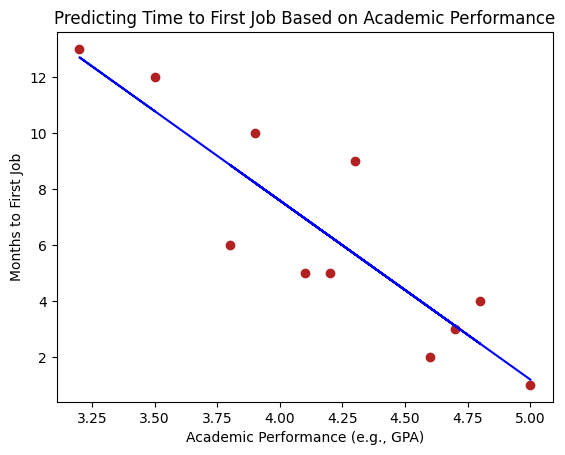

In [31]:
# Create a plot
fig, ax = plt.subplots()

# Show the plot
ax.set_xlabel('Academic Performance (e.g., GPA)')
ax.set_ylabel('Months to First Job')
ax.set_title('Predicting Time to First Job Based on Academic Performance')
ax.scatter(academic_performance, months_to_first_job, color='firebrick', label='Student Data')
ax.plot(academic_performance, predicted_months, color='b', label='Regression Line')
plt.show()

## Predict new values

In [43]:
# Predict time to first job for new academic performance values
new_academic_performance = np.random.uniform(3.2, 5.0, 5).reshape((-1, 1))
print("Average Grades: \n", new_academic_performance)
new_predicted_months = model.predict(new_academic_performance)
print("Months to First Job: ", new_predicted_months)

Average Grades: 
 [[4.95580155]
 [4.45610092]
 [3.78732748]
 [3.94714893]
 [4.53298553]]
Months to First Job:  [1.47280074 4.66796054 8.94419691 7.92227494 4.17634897]
